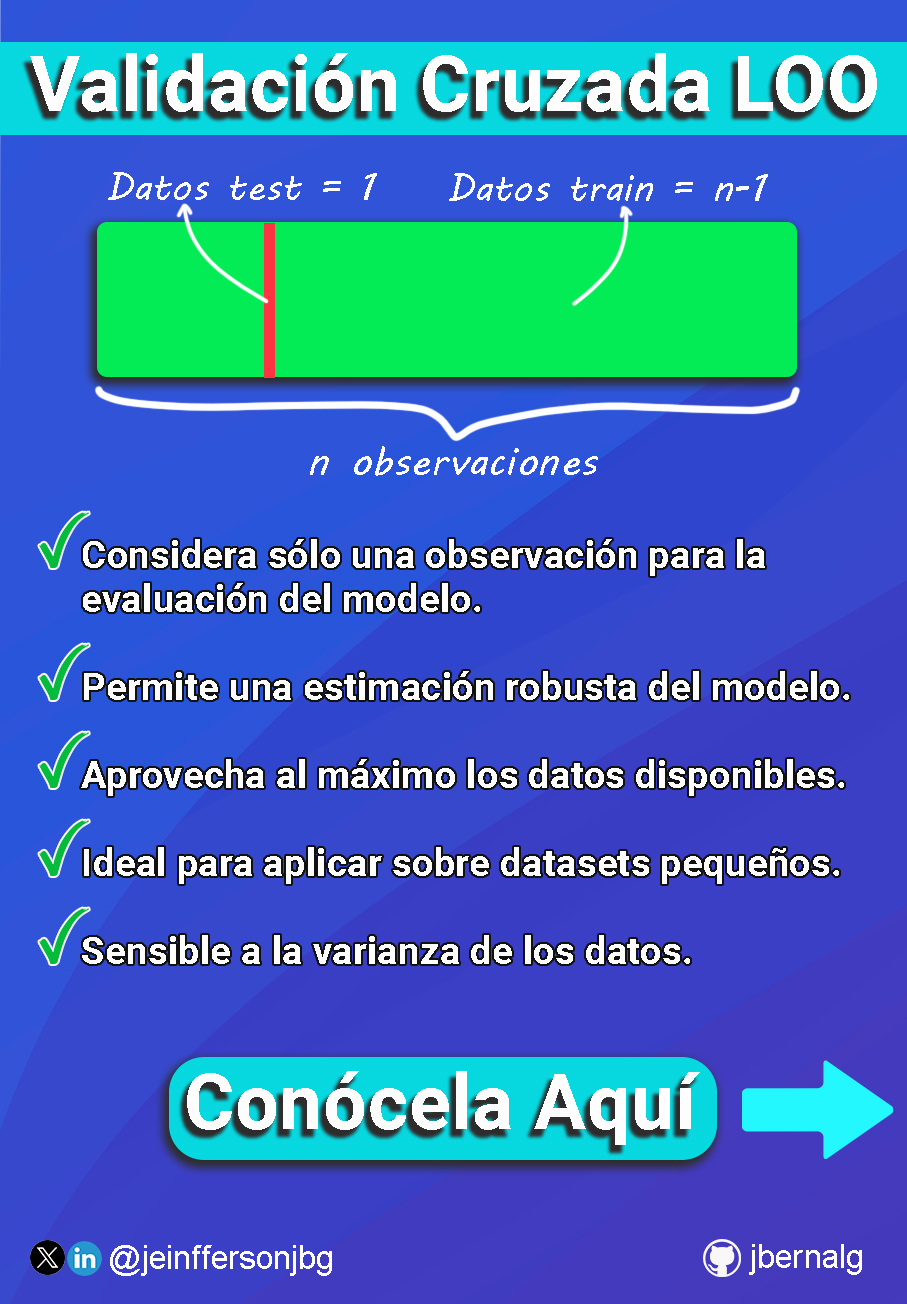

# Validación Cruzada LOO-CV

El método *Leave-One_Out Cross-Validation (LOO-CV)* es una técnica muy exhaustiva que consiste en entrenar el modelo utilizando todas menos una de las observaciones y luego se evalua el modelo en la observación que quedó afuera. El proceso se repite tantas veces como el número total de observaciones en el conjunto de datos, usando una muestra diferente como conjunto de prueba en cada iteración.

## Ventajas

- Todos los datos, excepto uno, se utilizan para entrenar el modelo en cada iteración, por lo que es una de las formas más eficientes de usar el conjunto de datos disponibles.

- Proporciona una estimación robusta del modelo, ya que se entrena y evalúa en casi todas las muestras posibles.

- Es ideal aplicar cuando el conjunto de datos es pequeño y cada muestra es valiosa. Ejemplo, en problemas médicos o biológicos donde hay pocas observaciones.

- Cuando las observaciones individuales pueden tener un impacto significativo en el rendimiento del modelo, este método puede ser muy útil porque evalúa el modelo para cada muestra detallando su comportamiento en situaciones extremas.

- Evita el sobreajuste en ciertos casos, ya que al dejar sólo una muestra para la prueba, se asegura que el modelo no vea esa muestra durante el entrenamiento. Esto reduce la probabilidad de ajustar excesivamente el modelo.

## Desventajas

- Es costoso computacionalmente especialmente para conjuntos de datos grandes.

- Puede generar una alta varianza debido a que el modelo se entrena con sólo una observación de prueba en cada iteración. Los resultados pueden ser muy sensibles a la elección de esa muestra lo que puede introducir varianza en las estimaciones de rendimiento.

## Proceso de LOO-CV

#### 1.- Dividir los datos
Para un conjunto de datos de $n$ observaciones, se crean $n$ subconjuntos, cada uno de los cuales contiene todas las muestras excepto una.

#### 2.- Entrenamiento y evaluación del modelo
Para cada iteración $i$, el modelo se entrena con las $n-1$ observaciones y se evalúa en la observación que quedó afuera.

#### 3.- Repetición del proceso
El proceso se repite  $n$ veces, utilizando una observación como conjunto de prueba en cada iteración.

#### 4.- Promediar los resultados
La métrica de evaluación se calcula promediando los resultados de las $n$ evaluaciones.

## Implementación Manual

Vamos a implementar el método de forma manual en un modelo de regresión lineal utilizando el conjunto de datos de diabetes que viene incluido en Scikit-learn.

In [1]:
# metodos y librerias a utilizar
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Procedemos a cargar los datos de diabetes

In [2]:
# cargar datos
diabetes = load_diabetes()

# Caracteristicas y variable objetivo
X, y = diabetes.data, diabetes.target

# mostrar los datos en un dataframe para mejorar visualizacion
diabetes_df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
# agregar la variable objetivo al df
diabetes_df['target'] = diabetes.target
# mostrar dataframe
diabetes_df


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


Inicializamos el modelo, creamos las listas para almacenar las métricas y definimos el número total de observaciones.

In [8]:
# inicializar modelo de regresion lineal
model = LinearRegression()

# lista para almacenar la metrica
mse_score = []
# lista para almacenar las predicciones
predicciones = []

# numero total de observaciones
n_obs = X.shape[0]

Ahora, aplicamos el proceso de LOO-CV de forma manual

In [9]:
# 3.- Repeticion del proceso
for i in range(n_obs):
    
    # 1.- Dividir los datos
    # seleccionar la muestra i como conjunto de prueba
    X_test = X[i, :].reshape(1, -1)
    y_test = y[i]
    
    # seleccionar todas las demas como conjunto de entrenamiento
    X_train = np.delete(X, i, axis=0)
    y_train = np.delete(y, i, axis=0)
    
    # 2.- Entrenamiento y evaluacion del modelo
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predicciones.append(y_pred[0])
    mse = mean_squared_error([y_test], y_pred)
    mse_score.append(mse)
    
# 4.- Promediar resultados
mean_mse = np.mean(mse_score)
# calcular r2 sobre todas las predicciones
r2 = r2_score(y, predicciones)

# mostrar promedio de los resultados
print(f'Promedio del Error cuadratico medio: {mean_mse}')
print(f'R-cuadrado Global: {r2}')

Promedio del Error cuadratico medio: 3001.746231732946
R-cuadrado Global: 0.4937935079824348


De esta forma, obtenemos una evaluación del modelo mucho más robusta y precisa.

## Implementación con Python

Para aplicar el método de forma directa, lo importamos de la librería Scikit-learn. Veamos cómo implementarlo en los datos del ejemplo anterior: X e y.

In [12]:
# importamos librerias requeridas
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import LeaveOneOut, cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, r2_score

Inicializamos el modelo, el objeto LeaveOneOut y creamos las listas para almacenar las predicciones y la métrica de evaluación.

In [21]:
# modelo
model = LinearRegression()

# LeaveOneOut
loo = LeaveOneOut()

# lista
predicciones = []
mse_scores = []

Ahora, calculamos LOO-CV junto a las predicciones y a la métrica de interés en cada iteración.

In [22]:
for train_index, test_index in loo.split(X):
    
    # conjunto de entrenamiento y prueba
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # entrenar el modelo con los datos de entrenamiento
    model.fit(X_train, y_train)
    
    # realizar la prediccion con la muestra de prueba
    y_pred = model.predict(X_test)
    
    # guardar prediccion
    predicciones.append(y_pred[0])
    
    # calcular error cuadratico medio
    mse = mean_squared_error([y_test], y_pred)
    mse_scores.append(mse)

Finalmente, calculamos el promedio de la métrica y el Coeficiente de Determinacion global del modelo.

In [23]:
mean_mse = np.mean(mse_scores)
mean_r2 = r2_score(y, predicciones)
print(f'Promedio del Error cuadratico medio: {mean_mse}')
print(f'R-Cuadrado Global: {mean_r2}')

Promedio del Error cuadratico medio: 3001.746231732946
R-Cuadrado Global: 0.4937935079824348


Vemos que obtenemos los mismos resultados que en la implementación manual.